In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore") 

In [2]:
df=pd.read_csv("customer_churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
df.iloc[:,:15]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month


In [12]:
df.iloc[:,15:]

,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Yes,Electronic check,29.85,29.85,No
1,No,Mailed check,56.95,1889.50,No
2,Yes,Mailed check,53.85,108.15,Yes
3,No,Bank transfer (automatic),42.30,1840.75,No
4,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...
7038,Yes,Mailed check,84.80,1990.50,No
7039,Yes,Credit card (automatic),103.20,7362.90,No
7040,Yes,Electronic check,29.60,346.45,No
7041,Yes,Mailed check,74.40,306.60,Yes


EDA PROCESS

In [3]:
df.drop("customerID",axis=1,inplace=True)

In [4]:
df.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"],errors="coerce")

<AxesSubplot:xlabel='count', ylabel='SeniorCitizen'>

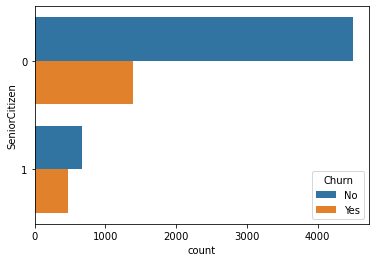

In [10]:
sns.countplot(y='SeniorCitizen', hue='Churn', data = df)

<AxesSubplot:xlabel='count', ylabel='InternetService'>

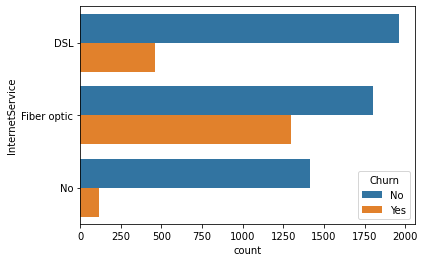

In [17]:
sns.countplot(y='InternetService', hue='Churn', data = df)

<AxesSubplot:xlabel='tenure', ylabel='Churn'>

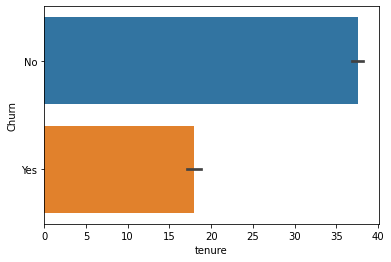

In [16]:
sns.barplot("tenure","Churn",data=df)

<AxesSubplot:xlabel='count', ylabel='Contract'>

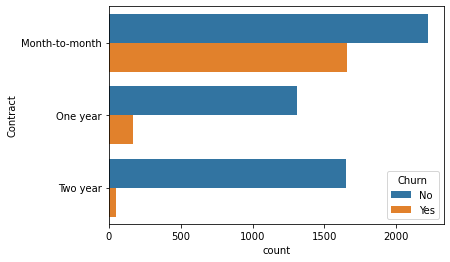

In [18]:
sns.countplot(y='Contract', hue='Churn', data = df)

<AxesSubplot:xlabel='TotalCharges', ylabel='Churn'>

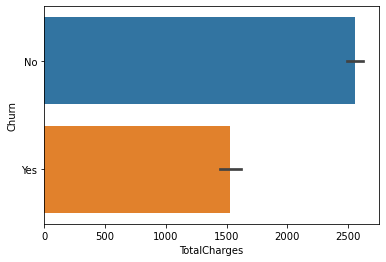

In [19]:
sns.barplot("TotalCharges","Churn",data=df)

In [21]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

LABEL ENCODER

In [22]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=["gender",'Partner','Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod','Churn']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1990.50,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,7362.90,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,346.45,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,306.60,1


In [23]:
df.dtypes

gender                int32
SeniorCitizen         int64
Partner               int32
Dependents            int32
tenure                int64
PhoneService          int32
MultipleLines         int32
InternetService       int32
OnlineSecurity        int32
OnlineBackup          int32
DeviceProtection      int32
TechSupport           int32
StreamingTV           int32
StreamingMovies       int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges        float64
Churn                 int32
dtype: object

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'Partner'}>,
        <AxesSubplot:title={'center':'Dependents'}>,
        <AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'PhoneService'}>,
        <AxesSubplot:title={'center':'MultipleLines'}>,
        <AxesSubplot:title={'center':'InternetService'}>],
       [<AxesSubplot:title={'center':'OnlineSecurity'}>,
        <AxesSubplot:title={'center':'OnlineBackup'}>,
        <AxesSubplot:title={'center':'DeviceProtection'}>,
        <AxesSubplot:title={'center':'TechSupport'}>,
        <AxesSubplot:title={'center':'StreamingTV'}>,
        <AxesSubplot:title={'center':'StreamingMovies'}>,
        <AxesSubplot:title={'center':'Contract'}>,
        <AxesSubplot:title={'center':'PaperlessBilling'}>],
       [<AxesSubplot:title={'center':'PaymentMethod'}>,
        <AxesSubplot:title={'center':'MonthlyCharges'}>,
        <Axe

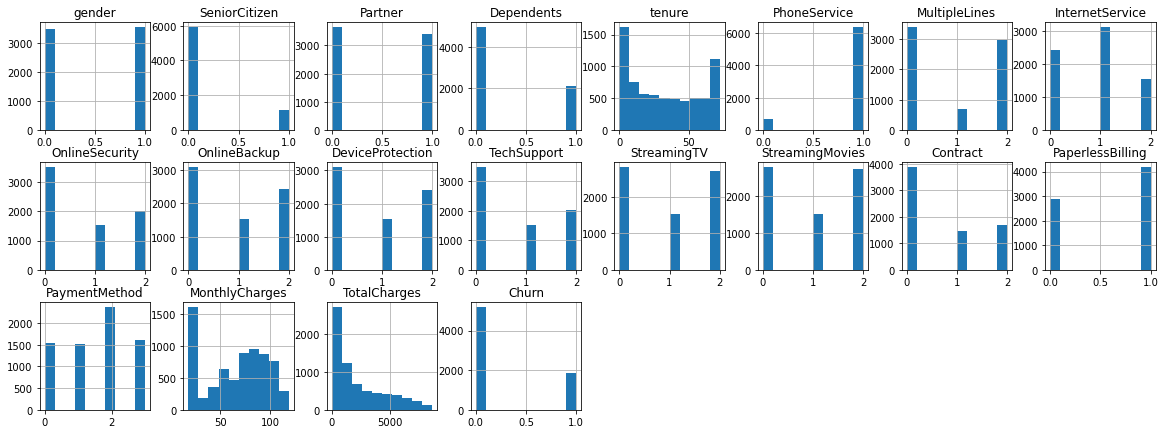

In [24]:
df.hist(figsize=(20,20),grid=True,layout=(8,8))

In [69]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2266.771362,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,401.450000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1397.475000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3794.737500,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [70]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.961642
Churn               1.063031
dtype: float64

gender                AxesSubplot(0.125,0.799681;0.0824468x0.0803191)
SeniorCitizen       AxesSubplot(0.223936,0.799681;0.0824468x0.0803...
Partner             AxesSubplot(0.322872,0.799681;0.0824468x0.0803...
Dependents          AxesSubplot(0.421809,0.799681;0.0824468x0.0803...
tenure              AxesSubplot(0.520745,0.799681;0.0824468x0.0803...
PhoneService        AxesSubplot(0.619681,0.799681;0.0824468x0.0803...
MultipleLines       AxesSubplot(0.718617,0.799681;0.0824468x0.0803...
InternetService     AxesSubplot(0.817553,0.799681;0.0824468x0.0803...
OnlineSecurity        AxesSubplot(0.125,0.703298;0.0824468x0.0803191)
OnlineBackup        AxesSubplot(0.223936,0.703298;0.0824468x0.0803...
DeviceProtection    AxesSubplot(0.322872,0.703298;0.0824468x0.0803...
TechSupport         AxesSubplot(0.421809,0.703298;0.0824468x0.0803...
StreamingTV         AxesSubplot(0.520745,0.703298;0.0824468x0.0803...
StreamingMovies     AxesSubplot(0.619681,0.703298;0.0824468x0.0803...
Contract            

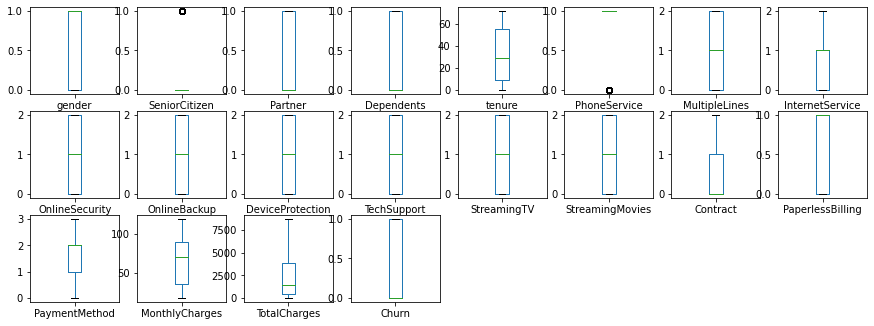

In [71]:
df.plot(kind="box",subplots=True,layout=(8,8),figsize=(15,15))

APPLYING BOXCOX METHOD

In [72]:
list=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn']
for i in list:
    vc=df[i].value_counts()
    print(vc)

1    3555
0    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
0    3641
1    3402
Name: Partner, dtype: int64
0    4933
1    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
1    6361
0     682
Name: PhoneService, dtype: int64
0    3390
2    2971
1     682
Name: MultipleLines, dtype: int64
1    3096
0    2421
2    1526
Name: InternetService, dtype: int64
0    3498
2    2019
1    1526
Name: OnlineSecurity, dtype: int64
0    3088
2    2429
1    1526
Name: OnlineBackup, dtype: int64
0    3095
2    2422
1    1526
Name: DeviceProtection, dtype: int64
0    3473
2    2044
1    1526
Name: TechSupport, dtype: int64
0    2810
2    2707
1    1526
Name: StreamingTV, dtype: int64
0    2785
2    2732
1    1526
Name: StreamingMovies, dtype: int64
0    3875
2    1695
1    1473
Name: Contract, dtype: int64
1    4171
0    2872
Name

In [73]:
df["SeniorCitizen"]=df["SeniorCitizen"].replace([0,1],[1,2])
df["Dependents"]=df["Dependents"].replace([0,1],[1,2])
df["PhoneService"]=df["PhoneService"].replace([0,1],[1,2])
df["Contract"]=df["Contract"].replace([0,1,2],[1,2,3])

In [74]:
values=["SeniorCitizen","Dependents","PhoneService","Contract","TotalCharges"]
from scipy.stats import boxcox
for i in values:
    df[i]=boxcox(df[i],0.5)
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.526491
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.308926
Churn               1.063031
dtype: float64

In [75]:
df.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [76]:
df["TotalCharges"]=df["TotalCharges"].replace(np.NaN,df["TotalCharges"].mean())

CORRELATION GRAPH

In [77]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000632,-0.011754,0.017352,-0.014569,-0.000875,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.143484,0.156530,-0.038551,0.220173,0.107001,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.295914,-0.014877,-0.154798,0.096848,0.339596,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.244106,-0.111377,-0.040292,-0.113890,0.078405,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.675016,0.006152,-0.370436,0.247900,0.867239,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002039,0.016505,-0.004184,0.247398,0.095346,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.109093,0.165146,-0.176793,0.433576,0.464827,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.097758,-0.138625,0.086140,-0.323260,-0.202880,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.376990,-0.157641,-0.096726,-0.053878,0.251633,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.283893,-0.013370,-0.124847,0.119777,0.362943,-0.195525


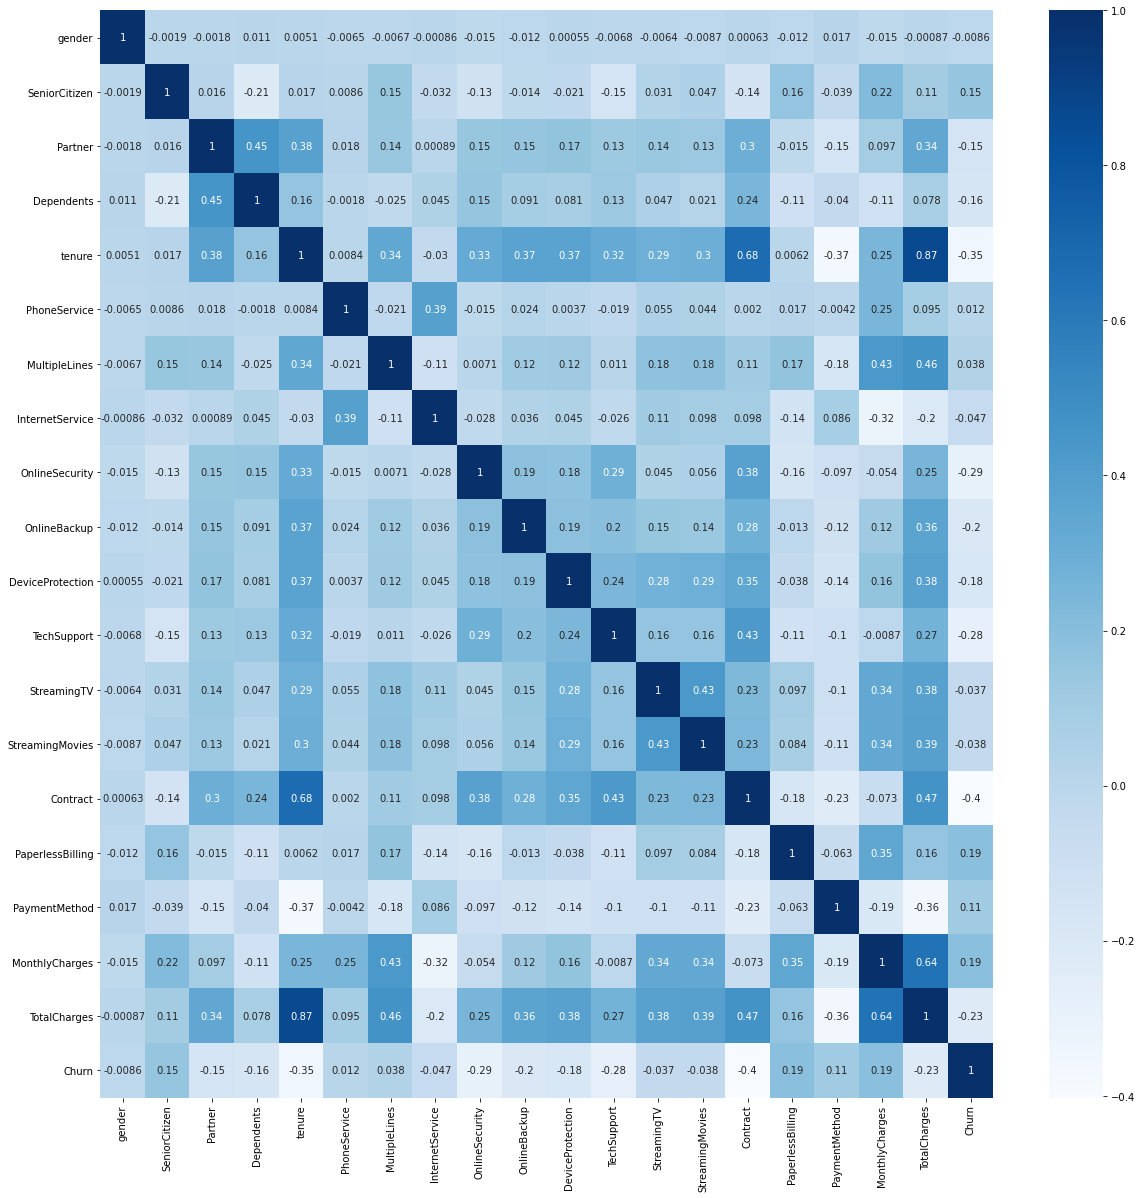

In [78]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap="Blues")
plt.show()

CHECKING FOR VIF FACTOR

In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df.iloc[:,df.columns != 'Churn']
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.000000,1,0.000000,1,0.000000,1,0,0,2,0,0,0,0,0.000000,1,2,29.85,8.927031
1,1,0.000000,0,0.000000,34,0.828427,0,0,2,0,2,0,0,0,0.828427,0,3,56.95,84.936759
2,1,0.000000,0,0.000000,2,0.828427,0,0,2,2,0,0,0,0,0.000000,1,3,53.85,18.799038
3,1,0.000000,0,0.000000,45,0.000000,1,0,2,0,2,2,0,0,0.828427,0,0,42.30,83.807925
4,0,0.000000,0,0.000000,2,0.828427,0,1,0,0,0,0,0,0,0.000000,1,2,70.70,22.629251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.000000,1,0.828427,24,0.828427,2,0,2,0,2,2,2,2,0.828427,1,3,84.80,87.230040
7039,0,0.000000,1,0.828427,72,0.828427,2,1,0,2,2,0,2,2,0.828427,1,1,103.20,169.614685
7040,0,0.000000,1,0.828427,11,0.000000,1,0,2,0,0,0,0,0,0.000000,1,2,29.60,35.226335
7041,1,0.828427,1,0.000000,4,0.828427,2,1,0,0,0,0,0,0,0.000000,1,3,74.40,33.019994


In [80]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["variable"]=x.columns
    vif["VIF factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [81]:
calc_vif(x)

,variable,VIF factor
0,gender,1.933502
1,SeniorCitizen,1.367198
2,Partner,2.821441
3,Dependents,1.954154
4,tenure,35.180358
5,PhoneService,14.402319
6,MultipleLines,2.760263
7,InternetService,4.454153
8,OnlineSecurity,2.261345
9,OnlineBackup,2.461452


In [82]:
df["Churn"].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

SMOTE PROCESS -as our target column is imbalanced

In [83]:
dfx=df.iloc[:,df.columns != 'Churn']
dfx

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0.000000,1,0.000000,1,0.000000,1,0,0,2,0,0,0,0,0.000000,1,2,29.85,8.927031
1,1,0.000000,0,0.000000,34,0.828427,0,0,2,0,2,0,0,0,0.828427,0,3,56.95,84.936759
2,1,0.000000,0,0.000000,2,0.828427,0,0,2,2,0,0,0,0,0.000000,1,3,53.85,18.799038
3,1,0.000000,0,0.000000,45,0.000000,1,0,2,0,2,2,0,0,0.828427,0,0,42.30,83.807925
4,0,0.000000,0,0.000000,2,0.828427,0,1,0,0,0,0,0,0,0.000000,1,2,70.70,22.629251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0.000000,1,0.828427,24,0.828427,2,0,2,0,2,2,2,2,0.828427,1,3,84.80,87.230040
7039,0,0.000000,1,0.828427,72,0.828427,2,1,0,2,2,0,2,2,0.828427,1,1,103.20,169.614685
7040,0,0.000000,1,0.828427,11,0.000000,1,0,2,0,0,0,0,0,0.000000,1,2,29.60,35.226335
7041,1,0.828427,1,0.000000,4,0.828427,2,1,0,0,0,0,0,0,0.000000,1,3,74.40,33.019994


In [88]:
dfy=df.iloc[:,19]
dfy

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int32

In [89]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(dfx,dfy)

In [90]:
trainy.value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

STANDARD SCALER

In [91]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
trainx=scale.fit_transform(trainx)

In [92]:
trainx

array([[-0.87703553, -0.51733551,  1.2711308 , ...,  0.43185788,
        -1.32691891, -1.34403193],
       [ 1.14020467, -0.51733551, -0.7867011 , ...,  1.436323  ,
        -0.38664454,  0.21530993],
       [ 1.14020467, -0.51733551, -0.7867011 , ...,  1.436323  ,
        -0.4942036 , -1.14150739],
       ...,
       [-0.87703553, -0.51733551, -0.7867011 , ...,  0.43185788,
        -0.56996133, -1.27328153],
       [-0.87703553, -0.51733551, -0.7867011 , ..., -0.57260724,
         0.23701654, -0.94946162],
       [-0.87703553, -0.51733551, -0.7867011 , ...,  1.436323  ,
        -1.69128717, -1.38772586]])

MACHINE LEARNING PROCESS

CHOOSING THE BEST RANDOM STATE

In [93]:
max_acc=0
max_rs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=i) 
    m=DecisionTreeClassifier()
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    acc=accuracy_score(predm,y_test)   
       
    if acc>max_acc:
        max_acc=acc
        max_rs=i
print("best accuracy=",max_acc,"on random state",max_rs)

best accuracy= 0.8254428341384863 on random state 132


In [94]:
x_train,x_test,y_train,y_test=train_test_split(trainx,trainy,test_size=.30,random_state=132)

In [95]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    i.fit(x_train,y_train)
    pred_test=i.predict(x_test)
    print("testing score=",accuracy_score(pred_test,y_test))         
    print("training score=",i.score(x_train,y_train))
    print(confusion_matrix(pred_test,y_test))
    print(classification_report(pred_test,y_test),"\n")

testing score= 0.7996779388083736
training score= 0.7819964103272125
[[1222  293]
 [ 329 1261]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1515
           1       0.81      0.79      0.80      1590

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105
 

testing score= 0.8235104669887279
training score= 0.998619356620185
[[1258  255]
 [ 293 1299]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1513
           1       0.84      0.82      0.83      1592

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105
 

testing score= 0.8280193236714976
training score= 0.8467485848405357
[[1296  279]
 [ 255 1275]]
              precision    recall  f1-score   support



CROSS VALIDATION PROCESS

In [96]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),RandomForestClassifier(),KNeighborsClassifier()]
for i in model:
    score=cross_val_score(i,trainx,trainy,cv=10) 
    print("score=",score)
    print("mean_score=",score.mean())
    print("std=",score.std(),"\n")

score= [0.76425121 0.75942029 0.74202899 0.77777778 0.80676329 0.77487923
 0.80289855 0.80193237 0.80947776 0.81237911]
mean_score= 0.7851808557358974
std= 0.023484219106812573 

score= [0.68888889 0.70434783 0.68019324 0.7826087  0.85410628 0.83574879
 0.85797101 0.87729469 0.85880077 0.89651838]
mean_score= 0.8036478569226025
std= 0.07895059672750934 

score= [0.7468599  0.74299517 0.71690821 0.79710145 0.86280193 0.84830918
 0.8647343  0.86666667 0.86266925 0.87717602]
mean_score= 0.818622207271606
std= 0.058578670579823695 

score= [0.74782609 0.74879227 0.75555556 0.8173913  0.91690821 0.89468599
 0.92077295 0.92077295 0.92263056 0.9303675 ]
mean_score= 0.8575703379773685
std= 0.07636608791061684 

score= [0.75458937 0.74299517 0.72657005 0.77004831 0.82705314 0.79903382
 0.81352657 0.79323671 0.82882012 0.80947776]
mean_score= 0.7865351012437044
std= 0.034160862786608334 



HYPERPARAMETER TUNING PROCESS FOR THE BEST MODEL

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
parameter={"max_depth": np.arange(2,10),
          "criterion": ["gini","entropy"],
          "max_leaf_nodes": np.arange(2,10),
          "max_features": ["auto","sqrt","log2"]}

In [100]:
gcv=GridSearchCV(RandomForestClassifier(),parameter,cv=10)

In [101]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [102]:
gcv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'log2',
 'max_leaf_nodes': 9}

In [103]:
final_model=RandomForestClassifier(criterion='gini',max_depth=8,max_features='log2',max_leaf_nodes=9)
final_model.fit(x_train,y_train)
pred=final_model.predict(x_test)
print(accuracy_score(pred,y_test))

0.8028985507246377


AUC-ROC CURVE

In [104]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [105]:
y_pred_prob=final_model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.77832063, 0.74410655, 0.54782055, ..., 0.14976663, 0.74252082,
       0.77130849])

In [106]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

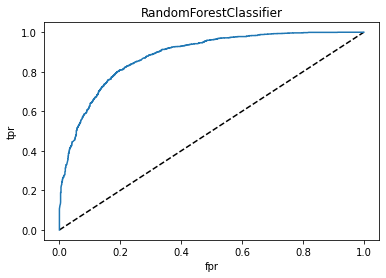

In [111]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr,tpr,label="RFC")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("RandomForestClassifier")
plt.show()

In [112]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
auc_score

0.8028772071325263

SAVING THE BEST MODEL

In [113]:
import joblib

joblib.dump(final_model,"customer_churn.obj")

['customer_churn.obj']

In [114]:
customer_churn_from_joblib=joblib.load("customer_churn.obj")
customer_churn_from_joblib.predict(x_test)

array([1, 1, 1, ..., 0, 1, 1])